<a href="https://colab.research.google.com/github/KarivetiKeerthi/Scaler-Projects/blob/main/OLA_Ensemble_Learning_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure

import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install numpy

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 2.65MB/s]


In [ ]:
ola = pd.read_csv('ola_driver_scaler.csv')
ola

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [ ]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
df = ola.copy()

In [ ]:
(df.isna().sum()/len(df))*100

Unnamed: 0               0.000000
MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [ ]:
df.head(10)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [ ]:
df.shape

(19104, 14)

In [ ]:
df["Driver_ID"].nunique()

2381

In [ ]:
df.drop(["Unnamed: 0"],axis = 1 , inplace=True)

In [ ]:
df["Gender"].replace({0.0:"Male",1.0:"Female"},inplace=True)

In [ ]:
df[df["Driver_ID"]==25]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
114,01/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,2552300,3
115,02/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,2143680,3
116,03/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,2925260,3
117,04/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,1030790,4
118,05/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,1833580,4
119,06/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,999610,4
120,07/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,1046670,4
121,08/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,677050,4
122,09/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,1934570,4
123,10/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,1297810,4


In [ ]:
agg_df = df.groupby(["Driver_ID"]).aggregate({'MMM-YY':'count',
                                     "Age":'max',
                                     "City":'max',
                                    "Education_Level":'max',
                                     "Income":'mean',
                                     "Dateofjoining":'max',
                                     "Joining Designation":'max',
                                     "Grade": 'mean',
                                    "Total Business Value":'sum',
                                     "Quarterly Rating": 'mean'})

In [ ]:
agg_df = agg_df.reset_index()

In [ ]:
final_data = agg_df.rename(columns={"MMM-YY":"No_of_Records",
                      "Dateofjoining":"Date_of_joining",
                      "Joining Designation":"Joining_Designation",
                      "Total Business Value" : "Total_Business_Value",
                      "Quarterly Rating":"Quarterly_Rating"})

In [ ]:
final_data

,Driver_ID,No_of_Records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
0,1,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.000000
1,2,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.000000
2,4,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.000000
3,5,3,29.0,C9,0,46368.0,01/09/19,1,1.0,120360,1.000000
4,6,5,31.0,C11,1,78728.0,31/07/20,3,3.0,1265000,1.600000
...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,24,34.0,C24,0,82815.0,15/10/15,2,3.0,21748820,2.625000
2377,2785,3,34.0,C9,0,12105.0,28/08/20,1,1.0,0,1.000000
2378,2786,9,45.0,C19,0,35370.0,31/07/18,2,2.0,2815090,1.666667
2379,2787,6,28.0,C20,2,69498.0,21/07/18,1,1.0,977830,1.500000


In [ ]:
final_data = pd.merge(left = df.groupby(["Driver_ID"])["Gender"].unique().apply(lambda x:x[-1]),
        right = final_data,
         on = "Driver_ID",
         how="outer")

In [ ]:
final_data = pd.merge(left = df.groupby(["Driver_ID"])["LastWorkingDate"].unique().apply(lambda x:x[-1]),
        right = final_data,
         on = "Driver_ID",
         how="outer")

In [ ]:
data = final_data.copy()
data

,Driver_ID,LastWorkingDate,Gender,No_of_Records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
0,1,03/11/19,Male,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.000000
1,2,NaN,Male,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.000000
2,4,27/04/20,Male,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.000000
3,5,03/07/19,Male,3,29.0,C9,0,46368.0,01/09/19,1,1.0,120360,1.000000
4,6,NaN,Female,5,31.0,C11,1,78728.0,31/07/20,3,3.0,1265000,1.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,NaN,Male,24,34.0,C24,0,82815.0,15/10/15,2,3.0,21748820,2.625000
2377,2785,28/10/20,Female,3,34.0,C9,0,12105.0,28/08/20,1,1.0,0,1.000000
2378,2786,22/09/19,Male,9,45.0,C19,0,35370.0,31/07/18,2,2.0,2815090,1.666667
2379,2787,20/06/19,Female,6,28.0,C20,2,69498.0,21/07/18,1,1.0,977830,1.500000


In [ ]:
data["Gender"].value_counts()

Gender
Male      1380
Female     956
Name: count, dtype: int64

In [ ]:
print(pd.Series(np.where(data["LastWorkingDate"].isna(),0,1)).value_counts())

1    1616
0     765
Name: count, dtype: int64


In [ ]:
data["Churn"] = data["LastWorkingDate"].fillna(0)

In [ ]:
def apply_0_1(y):
    if y == 0:
        return 0
    if y != 0:
        return 1

In [ ]:
data["Churn"] = data["Churn"].apply(apply_0_1)

In [ ]:
data["Churn"].value_counts()

Churn
1    1616
0     765
Name: count, dtype: int64

In [ ]:
data["Churn"].value_counts(normalize=True)*100

Churn
1    67.870643
0    32.129357
Name: proportion, dtype: float64

In [ ]:
data["Date_of_joining"].dtype
data["LastWorkingDate"].dtype

dtype('O')

In [ ]:
data["Date_of_joining"] = pd.to_datetime(data["Date_of_joining"])
data["LastWorkingDate"] = pd.to_datetime(data["LastWorkingDate"])

In [ ]:
data["joining_Year"] = data["Date_of_joining"].dt.year

<Axes: xlabel='Age', ylabel='Income'>

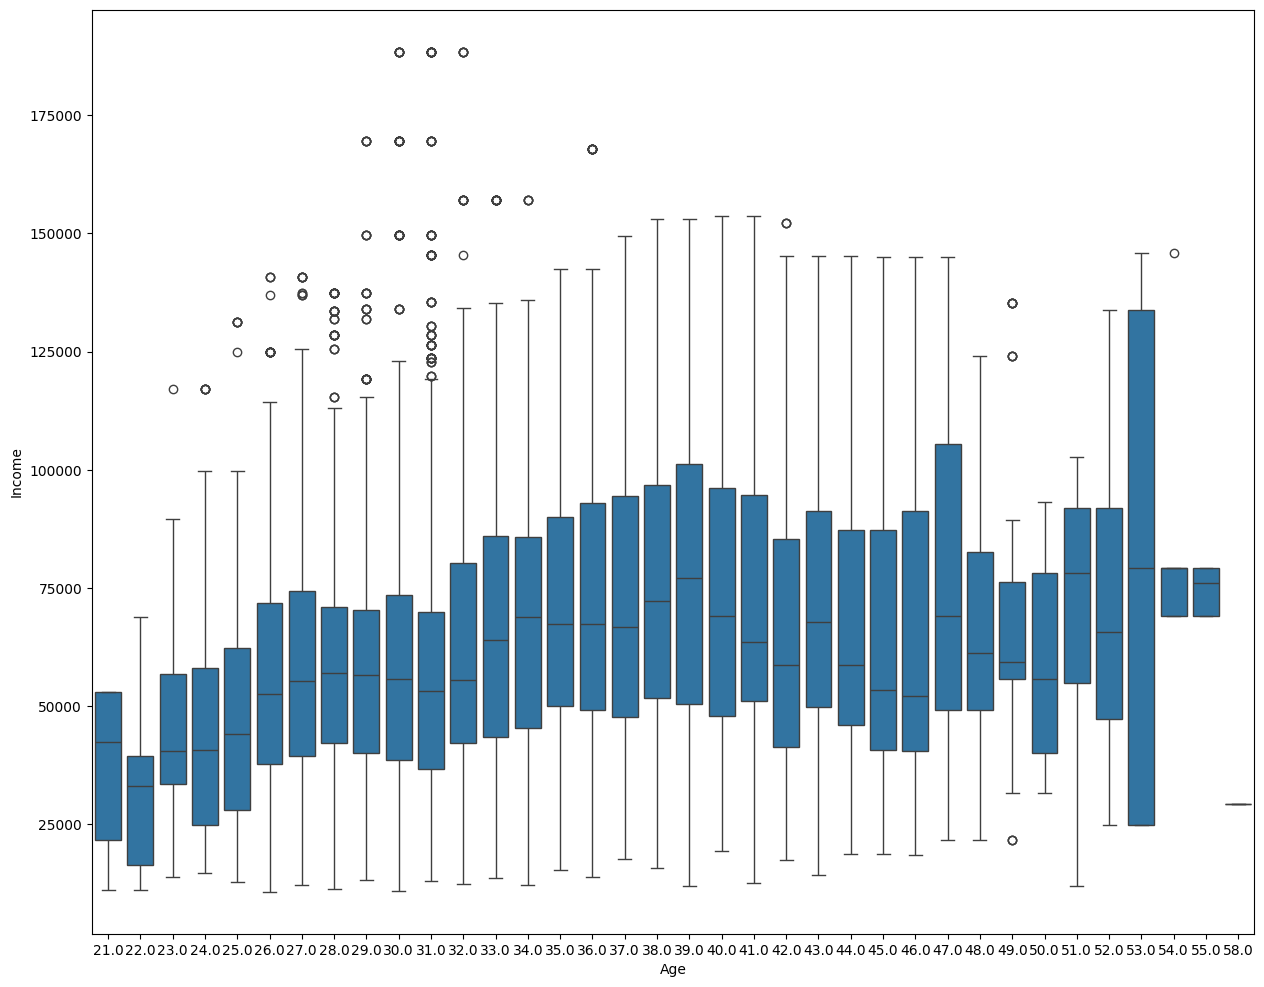

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(y=df["Income"],
            x=df["Age"])

<Axes: xlabel='Age', ylabel='Quarterly_Rating'>

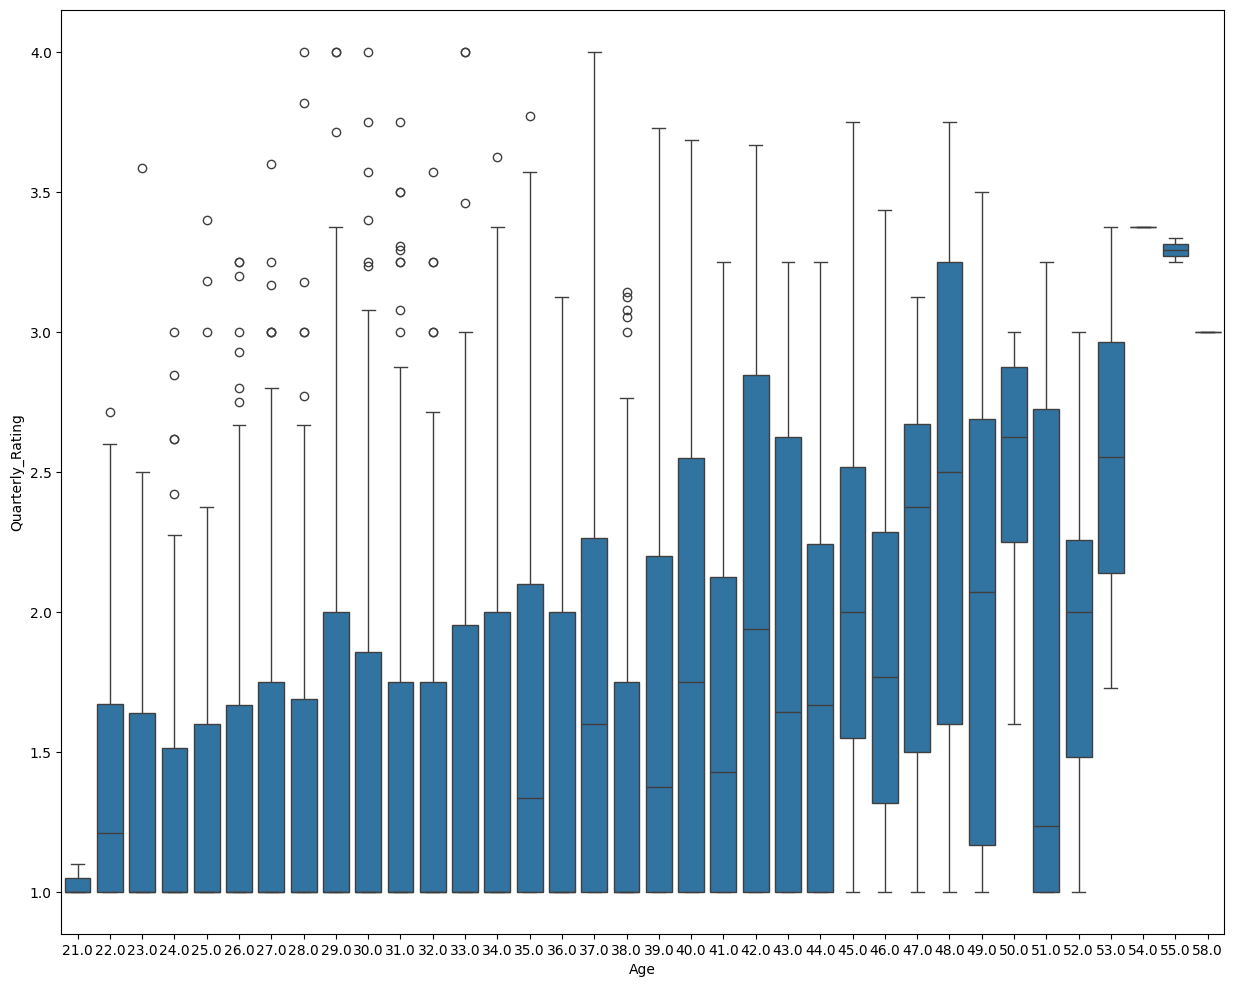

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(y=data["Quarterly_Rating"],
            x=data["Age"])

<Axes: xlabel='Quarterly_Rating', ylabel='Count'>

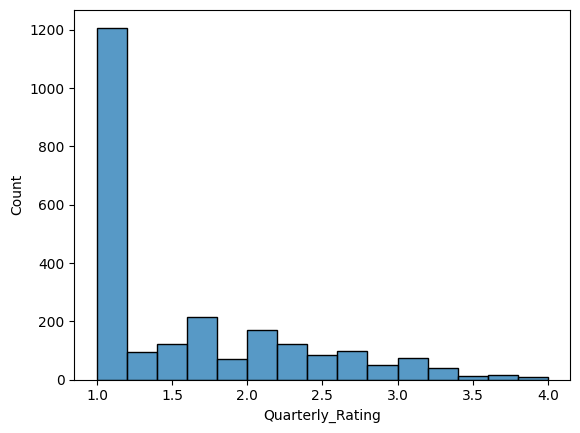

In [ ]:
sns.histplot(data["Quarterly_Rating"],bins = 15)

<Axes: xlabel='City'>

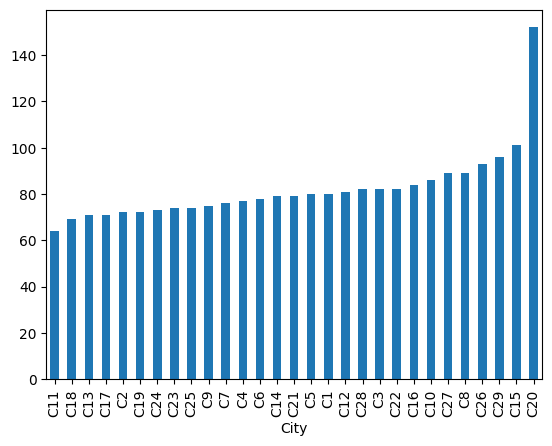

In [ ]:
data["City"].value_counts().sort_values().plot(kind = "bar")

<Axes: xlabel='Age'>

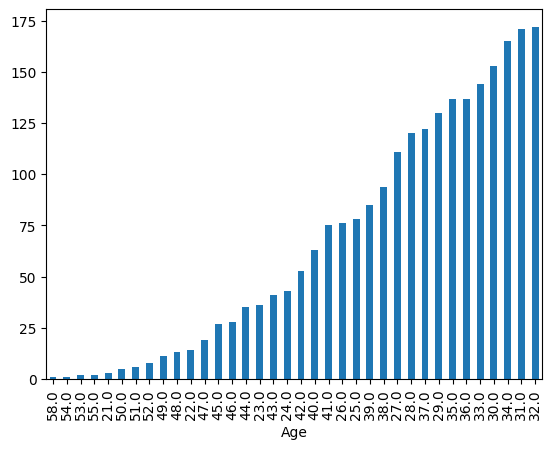

In [ ]:
data["Age"].value_counts().sort_values().plot(kind = "bar")

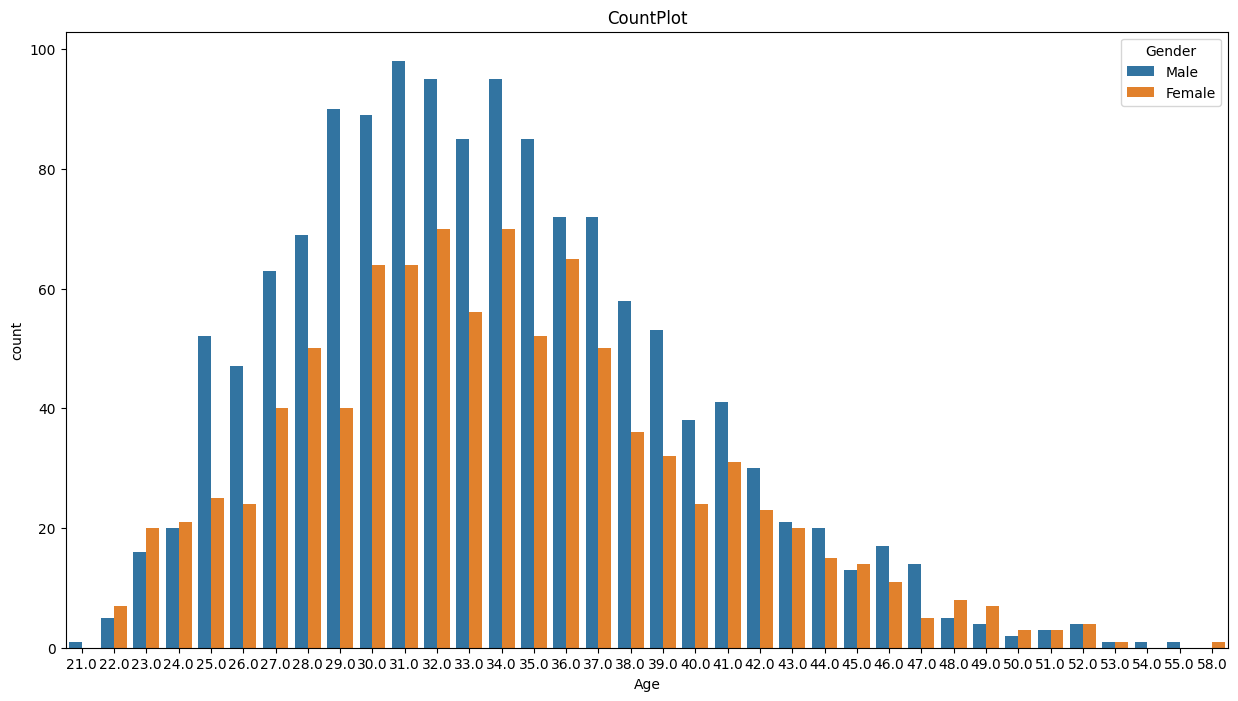

In [ ]:
plt.figure(figsize=(15,8))
countplot_01 = sns.countplot(x='Age', hue='Gender', data=data)
plt.title("CountPlot")
plt.show()

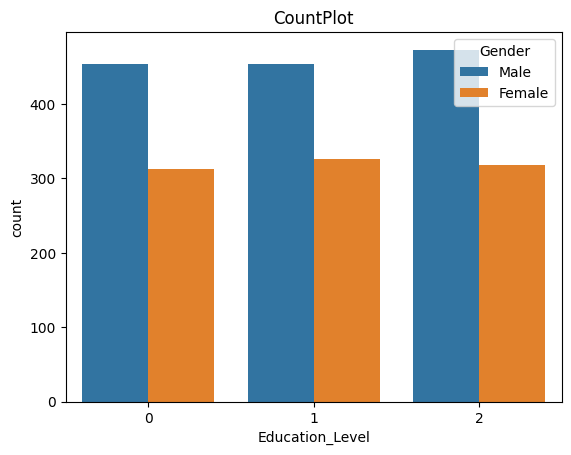

In [ ]:
countplot_02 = sns.countplot(x='Education_Level', hue='Gender', data=data)
plt.title("CountPlot")
plt.show()

In [ ]:
(data.isna().sum()/len(data))*100

Driver_ID                0.000000
LastWorkingDate         32.129357
Gender                   1.889962
No_of_Records            0.000000
Age                      0.000000
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Date_of_joining          0.000000
Joining_Designation      0.000000
Grade                    0.000000
Total_Business_Value     0.000000
Quarterly_Rating         0.000000
Churn                    0.000000
joining_Year             0.000000
dtype: float64

In [ ]:
data["Churn"].value_counts(normalize=True)*100

Churn
1    67.870643
0    32.129357
Name: proportion, dtype: float64

In [ ]:
def app_rating_inc(y):

    if len(y)>=2:
        for i in range(len(y)):
            if y[-1]>y[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [ ]:
Quarterly_Rating_increased = df.groupby("Driver_ID")["Quarterly Rating"].unique().apply(app_rating_inc)

In [ ]:
data = pd.merge(left = Quarterly_Rating_increased,
        right = data,on = "Driver_ID",how="outer")

In [ ]:
data["Quarterly_Rating_increased"] = data["Quarterly Rating"]

In [ ]:
data.drop(["Quarterly Rating"],axis=1,inplace=True)

In [ ]:
def app_income_inc(y):

    if len(y)>=2:
        for i in range(len(y)):
            if y[-1]>y[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [ ]:
data = pd.merge(left = df.groupby("Driver_ID")["Income"].unique().apply(app_income_inc).rename("Increased_Income"),
        right = data,on = "Driver_ID",how="outer")

In [ ]:
data

,Driver_ID,Increased_Income,LastWorkingDate,Gender,No_of_Records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_increased
0,1,0,2019-03-11,Male,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.000000,1,2018,0
1,2,0,NaT,Male,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.000000,0,2020,0
2,4,0,2020-04-27,Male,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.000000,1,2019,0
3,5,0,2019-03-07,Male,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.000000,1,2019,0
4,6,0,NaT,Female,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.600000,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0,NaT,Male,24,34.0,C24,0,82815.0,2015-10-15,2,3.0,21748820,2.625000,0,2015,1
2377,2785,0,2020-10-28,Female,3,34.0,C9,0,12105.0,2020-08-28,1,1.0,0,1.000000,1,2020,0
2378,2786,0,2019-09-22,Male,9,45.0,C19,0,35370.0,2018-07-31,2,2.0,2815090,1.666667,1,2018,0
2379,2787,0,2019-06-20,Female,6,28.0,C20,2,69498.0,2018-07-21,1,1.0,977830,1.500000,1,2018,0


In [ ]:
Mdata = data.copy()

In [ ]:
Mdata["Gender"].replace({"Male":0,
                       "Female":1},inplace=True)

In [ ]:
Mdata.drop(["Driver_ID"],axis = 1, inplace=True)

In [ ]:
Mdata.isna().sum()

Increased_Income                0
LastWorkingDate               765
Gender                         45
No_of_Records                   0
Age                             0
City                            0
Education_Level                 0
Income                          0
Date_of_joining                 0
Joining_Designation             0
Grade                           0
Total_Business_Value            0
Quarterly_Rating                0
Churn                           0
joining_Year                    0
Quarterly_Rating_increased      0
dtype: int64

In [ ]:
Mdata

,Increased_Income,LastWorkingDate,Gender,No_of_Records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_increased
0,0,2019-03-11,0.0,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.000000,1,2018,0
1,0,NaT,0.0,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.000000,0,2020,0
2,0,2020-04-27,0.0,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.000000,1,2019,0
3,0,2019-03-07,0.0,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.000000,1,2019,0
4,0,NaT,1.0,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.600000,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,NaT,0.0,24,34.0,C24,0,82815.0,2015-10-15,2,3.0,21748820,2.625000,0,2015,1
2377,0,2020-10-28,1.0,3,34.0,C9,0,12105.0,2020-08-28,1,1.0,0,1.000000,1,2020,0
2378,0,2019-09-22,0.0,9,45.0,C19,0,35370.0,2018-07-31,2,2.0,2815090,1.666667,1,2018,0
2379,0,2019-06-20,1.0,6,28.0,C20,2,69498.0,2018-07-21,1,1.0,977830,1.500000,1,2018,0


In [ ]:
pd.to_datetime("2021-06-01")

Timestamp('2021-06-01 00:00:00')

In [ ]:
Mdata["LastWorkingDate"] = Mdata["LastWorkingDate"].fillna(pd.to_datetime("2021-06-01"))

In [ ]:
(Mdata["LastWorkingDate"] - Mdata["Date_of_joining"])

0        77 days
1       207 days
2       142 days
3        57 days
4       305 days
          ...   
2376   2056 days
2377     61 days
2378    418 days
2379    334 days
2380    358 days
Length: 2381, dtype: timedelta64[ns]

In [ ]:
Mdata["Driver_tenure_days"] = (Mdata["LastWorkingDate"] - Mdata["Date_of_joining"])

In [ ]:
Mdata["Driver_tenure_days"] = Mdata["Driver_tenure_days"].dt.days

In [ ]:
Mdata.drop(["LastWorkingDate","Date_of_joining"],inplace=True,axis = 1)

In [ ]:
Mdata.drop(["Driver_tenure_days"],inplace=True,axis = 1)

In [ ]:
Mdata

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_increased
0,0,0.0,3,28.0,C23,2,57387.0,1,1.0,1715580,2.000000,1,2018,0
1,0,0.0,2,31.0,C7,2,67016.0,2,2.0,0,1.000000,0,2020,0
2,0,0.0,5,43.0,C13,2,65603.0,2,2.0,350000,1.000000,1,2019,0
3,0,0.0,3,29.0,C9,0,46368.0,1,1.0,120360,1.000000,1,2019,0
4,0,1.0,5,31.0,C11,1,78728.0,3,3.0,1265000,1.600000,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,0.0,24,34.0,C24,0,82815.0,2,3.0,21748820,2.625000,0,2015,1
2377,0,1.0,3,34.0,C9,0,12105.0,1,1.0,0,1.000000,1,2020,0
2378,0,0.0,9,45.0,C19,0,35370.0,2,2.0,2815090,1.666667,1,2018,0
2379,0,1.0,6,28.0,C20,2,69498.0,1,1.0,977830,1.500000,1,2018,0


In [ ]:
Mdata.columns

Index(['Increased_Income', 'Gender', 'No_of_Records', 'Age', 'City',
       'Education_Level', 'Income', 'Joining_Designation', 'Grade',
       'Total_Business_Value', 'Quarterly_Rating', 'Churn', 'joining_Year',
       'Quarterly_Rating_increased'],
      dtype='object')

In [ ]:
Mdata["Grade"] = np.round(Mdata["Grade"])

In [ ]:
Mdata["Quarterly_Rating"]= Mdata["Quarterly_Rating"].round()

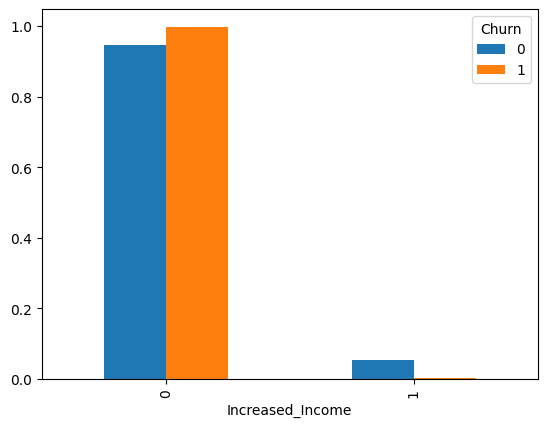

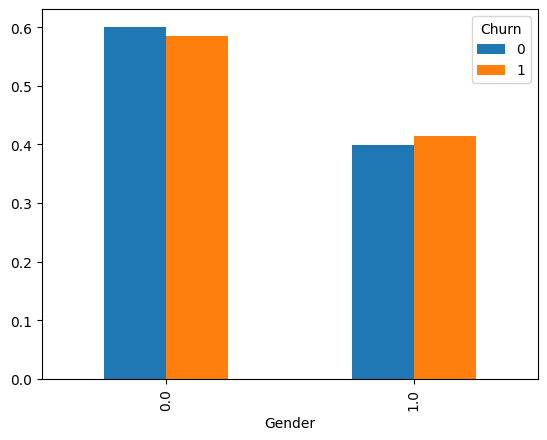

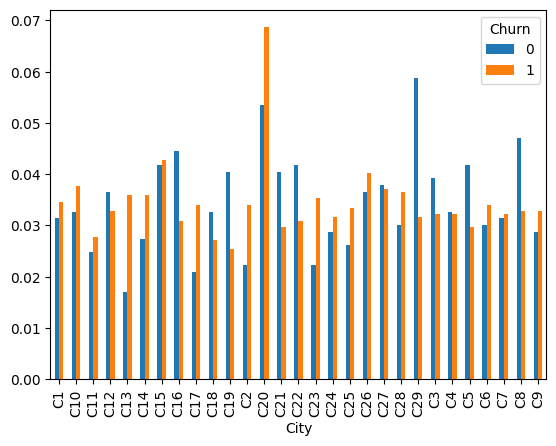

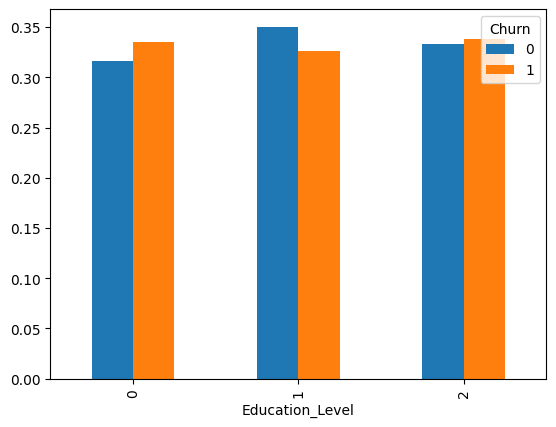

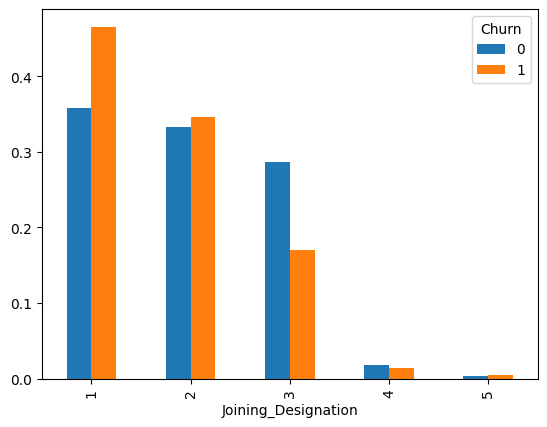

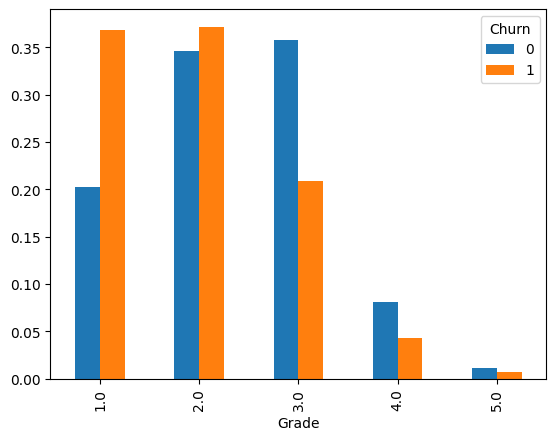

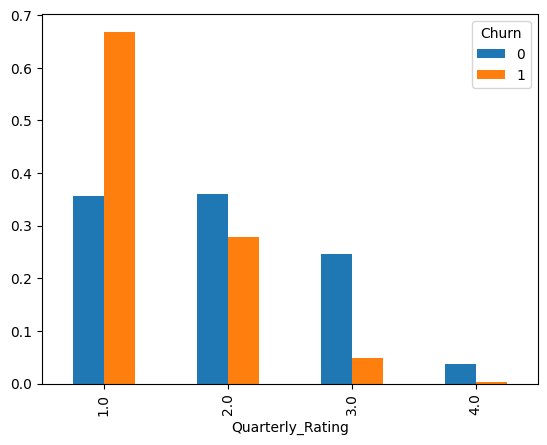

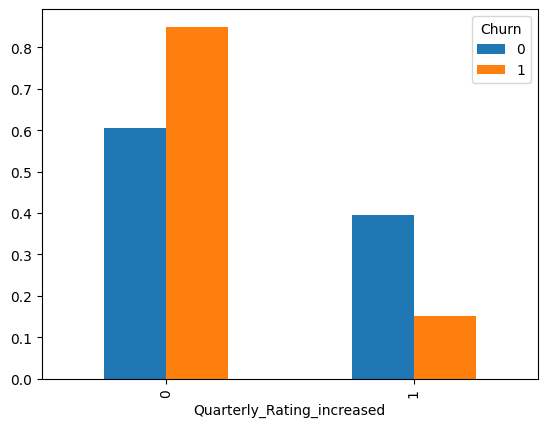

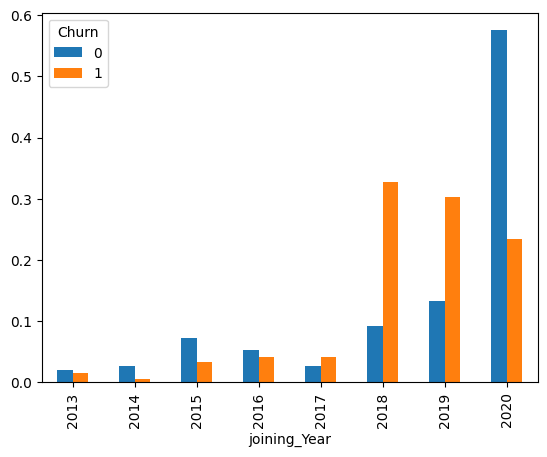

In [ ]:
categorical_features = ['Increased_Income', 'Gender','City','Education_Level',
                   'Joining_Designation','Grade','Quarterly_Rating','Quarterly_Rating_increased',"joining_Year"]

for col in categorical_features:
    pd.crosstab(index = Mdata[col],
               columns = Mdata["Churn"],
               normalize="columns").plot(kind = "bar")
    plt.show()

In [ ]:
Mdata.isna().sum()

Increased_Income               0
Gender                        45
No_of_Records                  0
Age                            0
City                           0
Education_Level                0
Income                         0
Joining_Designation            0
Grade                          0
Total_Business_Value           0
Quarterly_Rating               0
Churn                          0
joining_Year                   0
Quarterly_Rating_increased     0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
Mdata["Gender"] = imputer.fit_transform(X=Mdata["Gender"].values.reshape(-1,1),y=Mdata["Churn"].values.reshape(-1,1))

In [ ]:
Mdata["Gender"].value_counts(dropna=False)

Gender
0.0    1425
1.0     956
Name: count, dtype: int64

In [ ]:
Mdata.isna().sum()

Increased_Income              0
Gender                        0
No_of_Records                 0
Age                           0
City                          0
Education_Level               0
Income                        0
Joining_Designation           0
Grade                         0
Total_Business_Value          0
Quarterly_Rating              0
Churn                         0
joining_Year                  0
Quarterly_Rating_increased    0
dtype: int64

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder
TE = TargetEncoder()

In [ ]:
Mdata["City"] = TE.fit_transform(X = Mdata["City"],y = Mdata["Churn"])

In [ ]:
Mdata["joining_Year"] = TE.fit_transform(X = Mdata["joining_Year"],y = Mdata["Churn"])

In [ ]:
Mdata

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_increased
0,0,0.0,3,28.0,0.769859,2,57387.0,1,1.0,1715580,2.0,1,2018,0
1,0,0.0,2,31.0,0.684190,2,67016.0,2,2.0,0,1.0,0,2020,0
2,0,0.0,5,43.0,0.816064,2,65603.0,2,2.0,350000,1.0,1,2019,0
3,0,0.0,3,29.0,0.706553,0,46368.0,1,1.0,120360,1.0,1,2019,0
4,0,1.0,5,31.0,0.702829,1,78728.0,3,3.0,1265000,2.0,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,0.0,24,34.0,0.698531,0,82815.0,2,3.0,21748820,3.0,0,2015,1
2377,0,1.0,3,34.0,0.706553,0,12105.0,1,1.0,0,1.0,1,2020,0
2378,0,0.0,9,45.0,0.570044,0,35370.0,2,2.0,2815090,2.0,1,2018,0
2379,0,1.0,6,28.0,0.730263,2,69498.0,1,1.0,977830,2.0,1,2018,0


<Axes: >

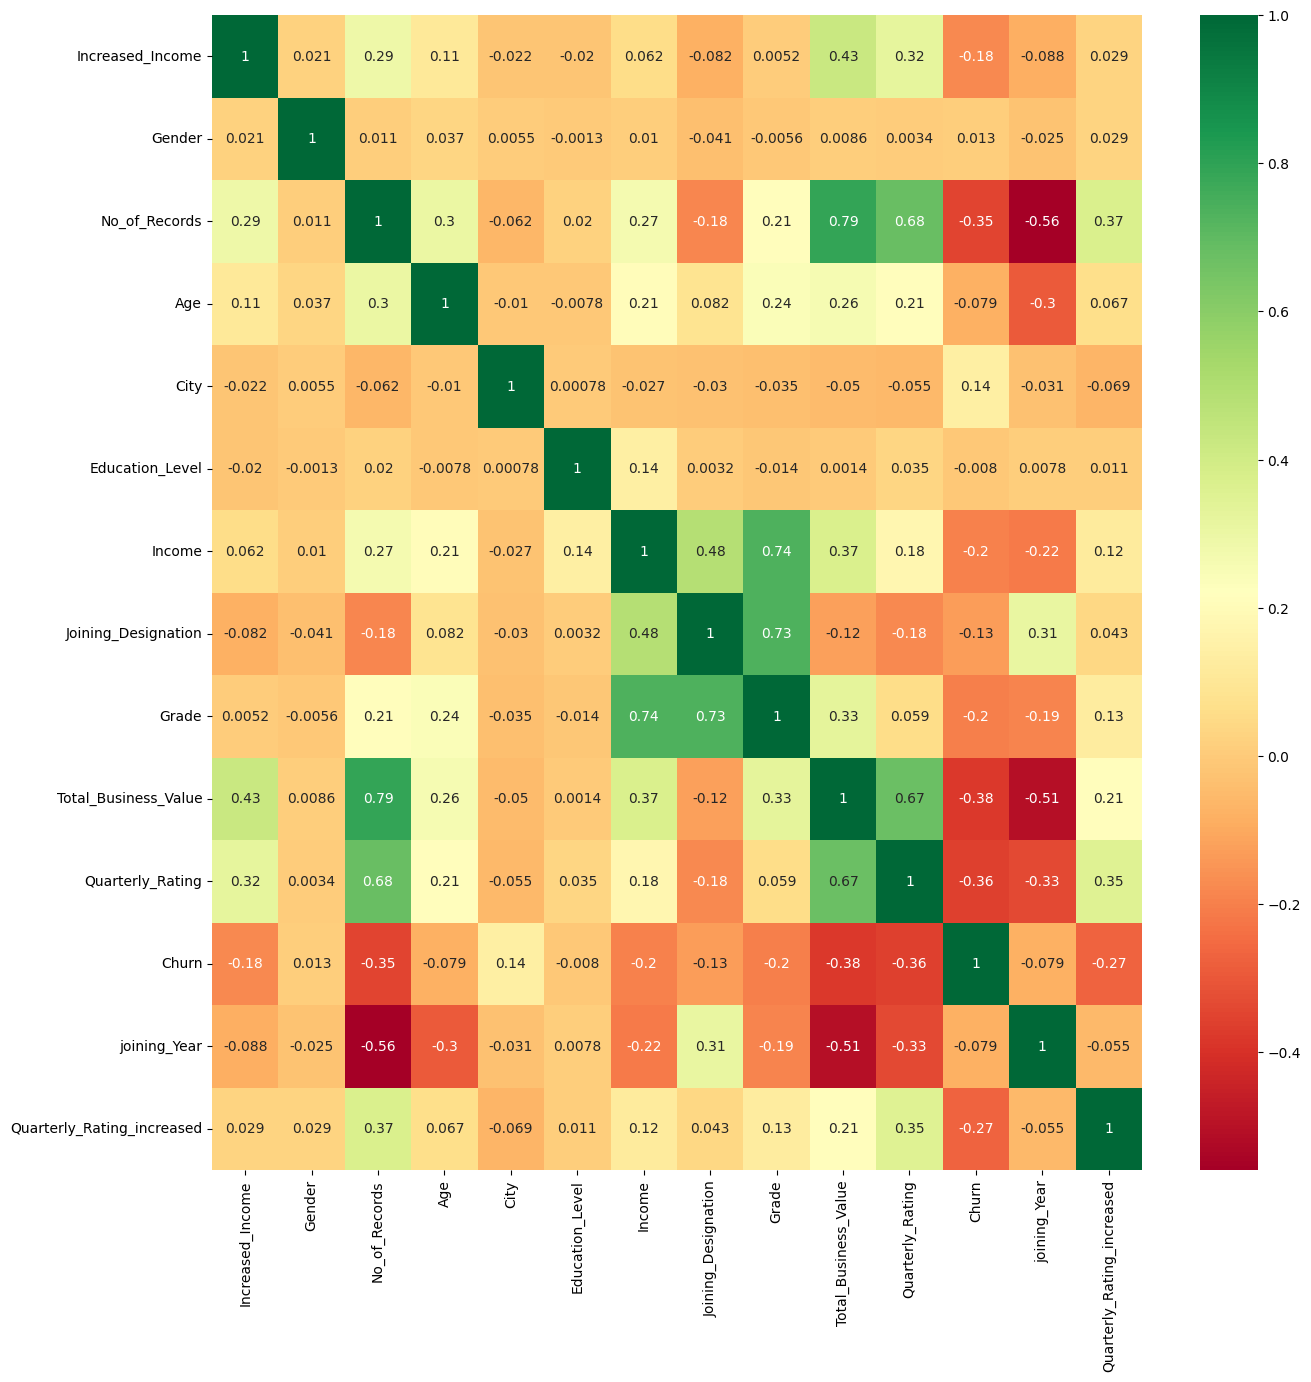

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(Mdata.corr(),annot=True, cmap="RdYlGn", annot_kws={"size":10
                                                               })

In [ ]:
X = Mdata.drop(["Churn"],axis = 1)
y = Mdata["Churn"]

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

In [ ]:
X = pd.DataFrame(imputer.fit_transform(X),columns=X.columns)
X

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,joining_Year,Quarterly_Rating_increased
0,0.0,0.0,3.0,28.0,0.769859,2.0,57387.0,1.0,1.0,1715580.0,2.0,2018.0,0.0
1,0.0,0.0,2.0,31.0,0.684190,2.0,67016.0,2.0,2.0,0.0,1.0,2020.0,0.0
2,0.0,0.0,5.0,43.0,0.816064,2.0,65603.0,2.0,2.0,350000.0,1.0,2019.0,0.0
3,0.0,0.0,3.0,29.0,0.706553,0.0,46368.0,1.0,1.0,120360.0,1.0,2019.0,0.0
4,0.0,1.0,5.0,31.0,0.702829,1.0,78728.0,3.0,3.0,1265000.0,2.0,2020.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.0,0.0,24.0,34.0,0.698531,0.0,82815.0,2.0,3.0,21748820.0,3.0,2015.0,1.0
2377,0.0,1.0,3.0,34.0,0.706553,0.0,12105.0,1.0,1.0,0.0,1.0,2020.0,0.0
2378,0.0,0.0,9.0,45.0,0.570044,0.0,35370.0,2.0,2.0,2815090.0,2.0,2018.0,0.0
2379,0.0,1.0,6.0,28.0,0.730263,2.0,69498.0,1.0,1.0,977830.0,2.0,2018.0,0.0


In [ ]:
X.describe()

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,joining_Year,Quarterly_Rating_increased
count,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000
mean,0.018480,0.401512,8.02352,33.663167,0.678662,1.00756,59232.460484,1.820244,2.078538,4.586742e+06,1.573289,2018.536329,0.228895
std,0.134706,0.490307,6.78359,5.983375,0.065356,0.81629,28298.214012,0.841433,0.931321,9.127115e+06,0.745987,1.609597,0.420210
min,0.000000,0.000000,1.00000,21.000000,0.531324,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,2013.000000,0.000000
25%,0.000000,0.000000,3.00000,29.000000,0.634237,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,2018.000000,0.000000
50%,0.000000,0.000000,5.00000,33.000000,0.698531,1.00000,55285.000000,2.000000,2.000000,8.176800e+05,1.000000,2019.000000,0.000000
75%,0.000000,1.000000,10.00000,37.000000,0.719430,2.00000,75835.000000,2.000000,3.000000,4.173650e+06,2.000000,2020.000000,0.000000
max,1.000000,1.000000,24.00000,58.000000,0.816064,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,2020.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train ,y_test = train_test_split(X,y,random_state=5,test_size=0.2)

In [ ]:
y.value_counts()

Churn
1    1616
0     765
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(n_estimators=100,
    criterion='entropy',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight="balanced",
    ccp_alpha=0.0085,
    max_samples=None,)

In [ ]:
RF.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.0085, class_weight='balanced',
                       criterion='entropy', max_depth=10)

In [ ]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.8702731092436975, 0.8637316561844863)

In [ ]:
RF.feature_importances_

array([5.58018002e-03, 1.46342481e-04, 2.80639032e-01, 1.31780013e-02,
       1.49761762e-02, 1.06142924e-03, 2.19392620e-02, 3.52909079e-02,
       1.79661500e-02, 1.60210450e-01, 8.68769876e-02, 3.17462962e-01,
       4.46721205e-02])

In [ ]:
X.columns

Index(['Increased_Income', 'Gender', 'No_of_Records', 'Age', 'City',
       'Education_Level', 'Income', 'Joining_Designation', 'Grade',
       'Total_Business_Value', 'Quarterly_Rating', 'joining_Year',
       'Quarterly_Rating_increased'],
      dtype='object')

<Axes: >

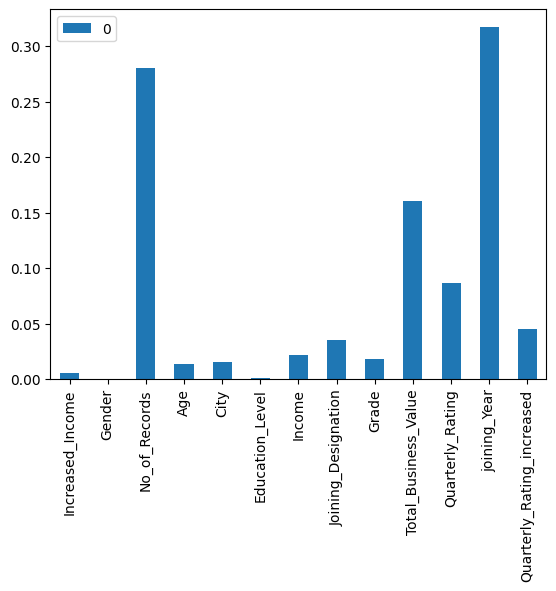

In [ ]:
pd.DataFrame(data=RF.feature_importances_,
            index=X.columns).plot(kind="bar")

In [ ]:
from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix

In [ ]:
confusion_matrix(y_test,RF.predict(X_test) )

array([[142,  20],
       [ 45, 270]])

In [ ]:
confusion_matrix(y_train,RF.predict(X_train) )

array([[ 544,   59],
       [ 188, 1113]])

In [ ]:
f1_score(y_test,RF.predict(X_test)),f1_score(y_train,RF.predict(X_train))

(0.8925619834710743, 0.9001213101496157)

In [ ]:
precision_score(y_test,RF.predict(X_test)),precision_score(y_train,RF.predict(X_train))

(0.9310344827586207, 0.9496587030716723)

In [ ]:
recall_score(y_test,RF.predict(X_test)),recall_score(y_train,RF.predict(X_train))

(0.8571428571428571, 0.8554957724827056)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":[7,10,15],
             "n_estimators":[100,200,300,400],
             "max_features":[4,7,10],
             "ccp_alpha":[0.0005,0.00075,0.001]}

RFC = RandomForestClassifier()
grid_search = GridSearchCV(
    estimator = RFC,
    param_grid = parameters,
    scoring = "accuracy",
    n_jobs = -1,
    refit=True,
    cv=3,
    pre_dispatch='2*n_jobs',
    return_train_score=False)

In [ ]:
grid_search.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0005, 0.00075, 0.001],
                         'max_depth': [7, 10, 15], 'max_features': [4, 7, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(ccp_alpha=0.00075, max_depth=10, max_features=7,
                       n_estimators=300)

In [ ]:
grid_search.best_score_

0.8897182410558302

In [ ]:
grid_search.best_params_

{'ccp_alpha': 0.00075, 'max_depth': 10, 'max_features': 7, 'n_estimators': 300}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,
    criterion='entropy',
    max_depth=7,
    min_samples_split=2,
    min_samples_leaf=1,

    class_weight="balanced",
    ccp_alpha=0.0001,
    max_samples=None)

In [ ]:
RF.fit(X_train , y_train)

RandomForestClassifier(ccp_alpha=0.0001, class_weight='balanced',
                       criterion='entropy', max_depth=7)

In [ ]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.9054621848739496, 0.8888888888888888)

In [ ]:
y_test_pred = RF.predict(X_test)
y_train_pred = RF.predict(X_train)

In [ ]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)

(0.9141004862236629, 0.9288537549407115)

In [ ]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)

(0.9337748344370861, 0.9560618388934092)

In [ ]:
recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.8952380952380953, 0.90315142198309)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
bagging_classifier_model = BaggingClassifier(base_estimator=  DecisionTreeClassifier(max_depth=7,
                                                                                     class_weight="balanced"),
                                            n_estimators=50,
                                            max_samples=1.0,
                                            max_features=1.0,
                                            bootstrap=True,
                                            bootstrap_features=False,
                                            oob_score=False,
                                            warm_start=False,
                                            n_jobs=None,
                                            random_state=None,
                                            verbose=0,)

In [ ]:
bagging_classifier_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=7),
                  n_estimators=50)

In [ ]:
from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix

In [ ]:
y_test_pred = bagging_classifier_model.predict(X_test)
y_train_pred = bagging_classifier_model.predict(X_train)

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[143,  19],
       [ 44, 271]])

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[ 557,   46],
       [ 119, 1182]])

In [ ]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)

(0.8958677685950414, 0.9347568208778173)

In [ ]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)

(0.9344827586206896, 0.9625407166123778)

In [ ]:
recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.8603174603174604, 0.9085318985395849)

In [ ]:
bagging_classifier_model.score(X_test,y_test)

0.8679245283018868

In [ ]:
bagging_classifier_model.score(X_train,y_train)

0.9133403361344538

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":[2,4,6,10],
             "n_estimators":[100,200,300,400]    }


grid_search = GridSearchCV(
    estimator = XGBClassifier(),
    param_grid = parameters,
    scoring = "accuracy",
    n_jobs = -1,
    refit=True,
    cv=3,
    pre_dispatch='2*n_jobs',
    return_train_score=False)


grid_search.fit(X_train,y_train.values.ravel())

grid_search.best_estimator_

grid_search.best_score_

grid_search.best_params_

{'max_depth': 2, 'n_estimators': 100}

In [ ]:
xgb = XGBClassifier(n_estimators=100,
                   max_depth = 2)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_test_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[124,  38],
       [ 27, 288]])

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[ 518,   85],
       [  74, 1227]])

In [ ]:
xgb.score(X_train,y_train),xgb.score(X_test,y_test)

(0.9164915966386554, 0.8637316561844863)

In [ ]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)

(0.8985959438377534, 0.939150401836969)

In [ ]:
recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.9142857142857143, 0.9431206764027671)

In [ ]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)

(0.8834355828220859, 0.9352134146341463)

In [ ]:
xgb.feature_importances_

array([0.        , 0.01611706, 0.17770752, 0.01213652, 0.0177371 ,
       0.01956165, 0.01636491, 0.02013278, 0.01096871, 0.05184174,
       0.22887574, 0.35447577, 0.07408047], dtype=float32)

<Axes: >

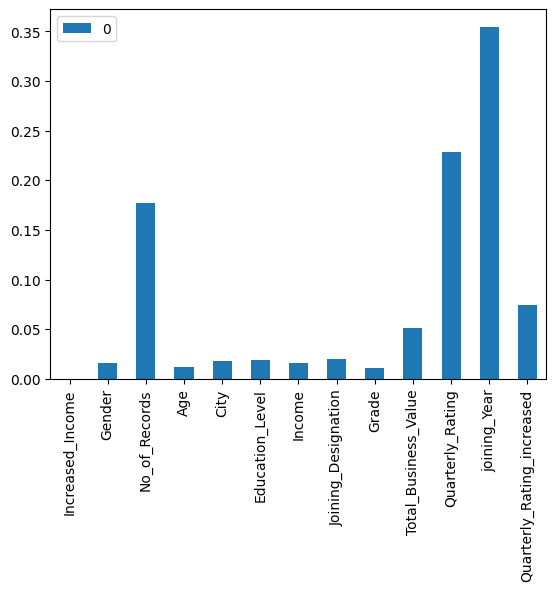

In [ ]:
pd.DataFrame(data=xgb.feature_importances_,
            index=X.columns).plot(kind="bar")

In [ ]:
def GradientBoostingClassifier(X, y):
    from sklearn.ensemble import  GradientBoostingClassifier
    from sklearn.metrics import f1_score, accuracy_score , roc_auc_score,auc,recall_score,precision_score
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=1)

    lr = GradientBoostingClassifier()
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    prob = lr.predict_proba(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print('Train Score : ', lr.score(X_train, y_train), '\n')
    print('Test Score : ', lr.score(X_test, y_test), '\n')
    print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
    print(cm, "---> confusion Matrix ", '\n')
    print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test, prob[:, 1]),'\n')
    print("precision score  test dataset:  ", precision_score(y_test, y_pred),'\n')
    print("Recall score  test dataset:  ", recall_score(y_test, y_pred), '\n')
    print("f1 score  test dataset :  ", f1_score(y_test, y_pred), '\n')
    return (prob[:,1], y_test)

In [ ]:
probs , y_test = GradientBoostingClassifier(X,y)

Train Score :  0.914390756302521 

Test Score :  0.8909853249475891 

Accuracy Score :  0.8909853249475891 

[[125  23]
 [ 29 300]] ---> confusion Matrix  

ROC-AUC score  test dataset:   0.9450320381171444 

precision score  test dataset:   0.9287925696594427 

Recall score  test dataset:   0.9118541033434651 

f1 score  test dataset :   0.9202453987730062 



In [ ]:
def plot_pre_curve(y_test,probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    plt.plot(recall, precision, marker='.')
    plt.title("Precision Recall curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

def plot_roc(y_test,prob):
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

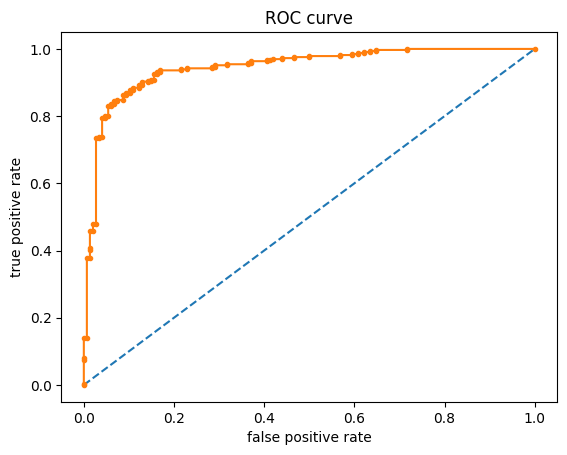

In [ ]:
plot_roc(y_test , probs)

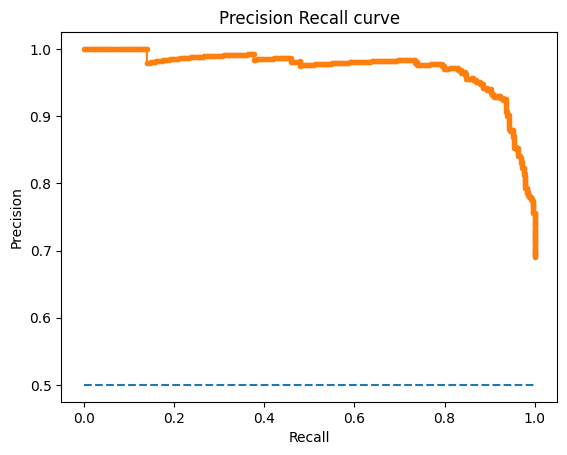

In [ ]:
plot_pre_curve(y_test , probs)

In [ ]:
filtered_data

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_increased


In [ ]:
rating_5_count = Mdata[Mdata['Quarterly_Rating'] == 5].shape[0]

In [ ]:
total_drivers = Mdata.shape[0]

In [ ]:
percentage_rating_5 = (rating_5_count / total_drivers) * 100

In [ ]:
print(f"The percentage of drivers who have received a quarterly rating of 5 is: {percentage_rating_5:.2f}%")

The percentage of drivers who have received a quarterly rating of 5 is: 0.00%
